In [11]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import pandas as pd
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm
% matplotlib inline

nc_filename = sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Pa/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))



filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*T200201-200712*.nc'))
ptrc=nc.Dataset(filename[0])
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total_r1.csv', '/ocean/xiaoxiny/research/data/total/Total_r2.csv', '/ocean/xiaoxiny/research/data/total/Total_r3.csv', '/ocean/xiaoxiny/research/data/total/Total_r4.csv', '/ocean/xiaoxiny/research/data/total/Total_r5.csv', '/ocean/xiaoxiny/research/data/total/Total_r6.csv']


In [12]:
import statsmodels.api as sm

In [13]:
# Method1: try total

Green      : 0.0174236435136 46.746751644
Yellow: 0.0133596345081 17.9293666781


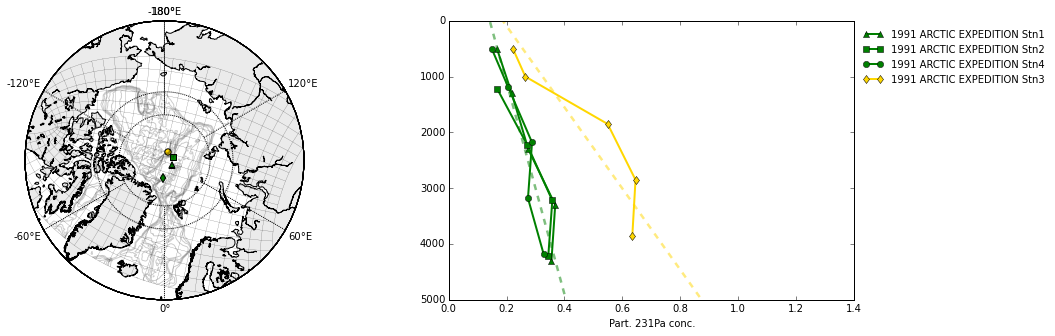

In [14]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0
# 1983,1991

for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
##============================
err_=[]
x_=[]
y_=[]

for j in ([0,1,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa part.']+data['231Pa diss.'];
    err =data['Pa_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
mywls = sm.WLS(x_, y2).fit()


plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.00246
kd=0.3

k_=Q/a
s_=(kd/k_+1)*Q/b
print 'Green      :',s_ , k_


##============================
err_=[]
x_=[]
y_=[]

for j in ([2]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values[1:];
    x=data['231Pa part.'][1:]+data['231Pa diss.'][1:];
    #err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    if j<12:
        name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        #err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
mywls = sm.WLS(x_, y2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.00246
k__=Q/a
s__=(kd/k__+1)*Q/b
print 'Yellow:',s__, k__

plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('Part. 231Pa conc.');plt.show()

In [15]:
# sinking rate is too low.. try another method.

# Method2: try to fink k from slope

Green      : 1342.94716232
Yellow: 1194.88015717


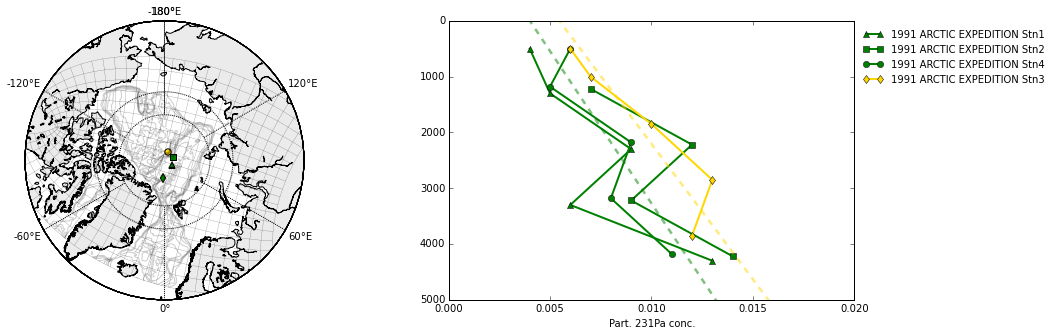

In [16]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0
# 1983,1991

for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
##============================
err_=[]
x_=[]
y_=[]

for j in ([0,1,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa part.']#+data['230Th diss.'];
    err =data['Pa_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
mywls = sm.WLS(x_, y2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

s_=0.00246/mywls.params[0]
print 'Green      :',s_


##============================
err_=[]
x_=[]
y_=[]

for j in ([2]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values[1:];
    x=data['231Pa part.'][1:]#+data['230Th diss.'];
    #err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    if j<12:
        name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        #err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)
mywls = sm.WLS(x_, y2).fit()

plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

s__=0.00246/mywls.params[0]
print 'Yellow:',s__

plt.xlim(0,0.02);plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('Part. 231Pa conc.');plt.show()

Green:      k 0.0108193342462 k_1 0.3
Yellow:     k 0.00457012310701 k_1 0.3


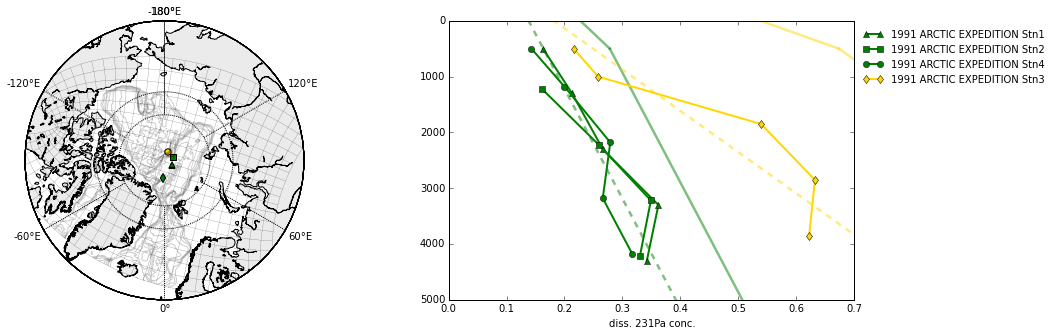

In [17]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0

#===============================================
err_=[]
x_=[]
y_=[]

for j in ([0,1,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa diss.']#+data['230Th diss.'];
    err =data['Pa_diss_err']
    xP=data['231Pa part.'][:]
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)

mywls = sm.WLS(x_, y2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)

a=mywls.params[0] #slope
b=mywls.params[1] #cons.  
Q= 0.00246
Jvalue_=0.3
Kvalue_=Q/s_*Jvalue_/a



#print analytical solu.
conc1=Q/Kvalue_+Jvalue_/Kvalue_*(Q/s_*2)*np.array([0,500])
conc2=conc1[-1]+Jvalue_/Kvalue_*(Q/s_)*np.array([500-500,5000-500])
plt.plot(conc1,[0, 500], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)
plt.plot(conc2,[500, 5000], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)


print 'Green:      k',Kvalue_,'k_1',Jvalue_
    
#====================================

err_=[]
x_=[]
y_=[]

for j in ([2]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values[1:];
    x=data['231Pa diss.'][1:]#+data['230Th diss.'];
    xP=data['231Pa part.'][1:]
    if j<12:
        err =data['Pa_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    if j<12:
        name= data['name'][0];     
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    
    for num in range (len(x)):
        err_.append(err[num])
        x_.append(x[num])
        y_.append(y[num])
        
y2 = sm.add_constant(y_,prepend=False)
err_=np.array(err_)
x_=np.array(x_)
y_=np.array(y_)

mywls = sm.WLS(x_, y2).fit()
plt.plot([0, 1.4],[0, 1.4]/mywls.params[0]-mywls.params[1]/mywls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)



a=mywls.params[0] #slope
b=mywls.params[1] #cons.     

Kvalue__=Q/s__*Jvalue_/a

print 'Yellow:     k',Kvalue__,'k_1',Jvalue_

#print analytical solu.
conc1=Q/Kvalue__+Jvalue_/Kvalue__*(Q/s__*2)*np.array([0,500])
conc2=conc1[-1]+Jvalue_/Kvalue__*(Q/s__)*np.array([500-500,5000-500])
plt.plot(conc1,[0, 500], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)
plt.plot(conc2,[500, 5000], \
         '-',c=col[j],linewidth=2.5,alpha=0.5)




plt.xlim(0,0.7);plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('diss. 231Pa conc.');plt.show()

Green:      k 0.0288515579899 k_1 0.8
Yellow:     k 0.012186994952 k_1 0.8


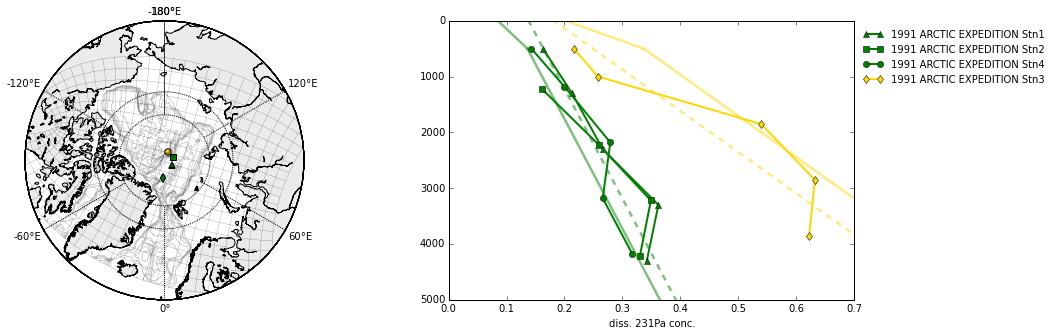

In [21]:
#0.8 # same as Th #Olivier Marchal  Ocean thermohaline circulation and  sendimentary Pa/Th ratio

Green:      k 0.0360644474873 k_1 1.0
Yellow:     k 0.01523374369 k_1 1.0


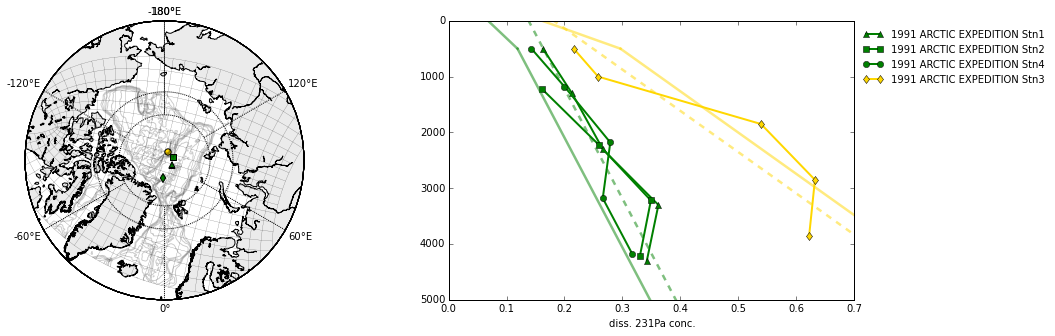

In [35]:
# 1.0

In [8]:
#ice=[0.923636,0.35]   #NASA

ice=[0.996364,0.477273]    #bt
k=[Kvalue__,Kvalue_]
s=[s__,s_]

[0 1] [ 0.04417362  0.01207027]


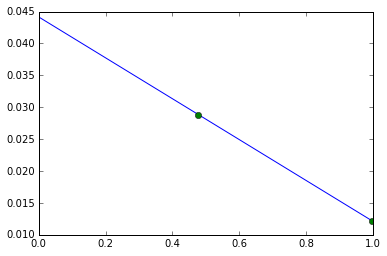

In [9]:
ice_ = sm.add_constant(ice,prepend=False)
paraK=sm.WLS(k,ice_).fit()
paraS=sm.WLS(s,ice_).fit()




x=np.array([0,1])
y=x*paraK.params[0]+paraK.params[1]
print x,y[:]
plt.plot(x,y)
plt.plot(np.array(ice), np.array(k), 'o')

[0 1] [ 1479.08588126  1193.84301411]


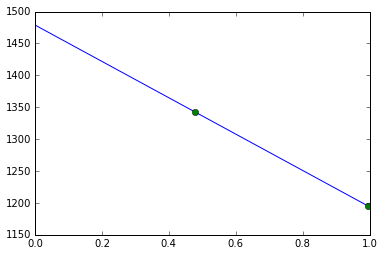

In [10]:
x=np.array([0,1])
y=x*paraS.params[0]+paraS.params[1]
print x,y[:]
plt.plot(x,y)
plt.plot(np.array(ice), np.array(s), 'o')